In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

import joblib


In [91]:
#Loading the datasets 
df = pd.read_csv(r"C:\Users\vivek\Downloads\Fuel_efficiency\fuel_efficiency_data_.csv")
# Visualising the data set 
df.head()

,Engine_Size,Cylinders,Compression_Ratio,Horsepower,Torque,RPM,Load_Percent,Ambient_Temp,Fuel_Type,Fuel_Efficiency_kmpl,Fuel_Type_Encoded
0,0.62,1,12.3,52,17,8772,25,28,Petrol,51.05,1
1,0.74,2,10.2,49,33,5130,26,42,Petrol,52.23,1
2,1.46,2,11.9,47,11,10311,25,22,Petrol,46.13,1
3,3.00,4,9.5,128,269,4047,79,5,Petrol,10.17,1
4,0.43,2,9.3,53,12,8556,11,10,Petrol,54.82,1


In [92]:
print(f"Shape:", {df.shape})
print(df.info())
print(df.describe())
print('\nMissing Values: \n', df.isnull().sum())

Shape: {(2000, 11)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine_Size           2000 non-null   float64
 1   Cylinders             2000 non-null   int64  
 2   Compression_Ratio     2000 non-null   float64
 3   Horsepower            2000 non-null   int64  
 4   Torque                2000 non-null   int64  
 5   RPM                   2000 non-null   int64  
 6   Load_Percent          2000 non-null   int64  
 7   Ambient_Temp          2000 non-null   int64  
 8   Fuel_Type             2000 non-null   object 
 9   Fuel_Efficiency_kmpl  2000 non-null   float64
 10  Fuel_Type_Encoded     2000 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 172.0+ KB
None
       Engine_Size    Cylinders  Compression_Ratio   Horsepower       Torque  \
count  2000.000000  2000.000000        2000.000000  2000.0000

 ***Note** : No Missing Values in datasets hence we can move further 

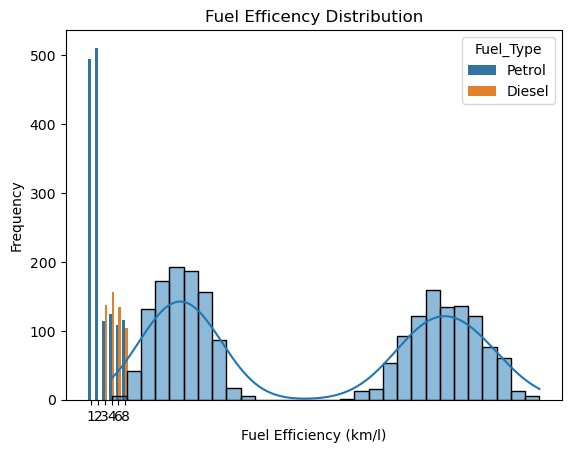

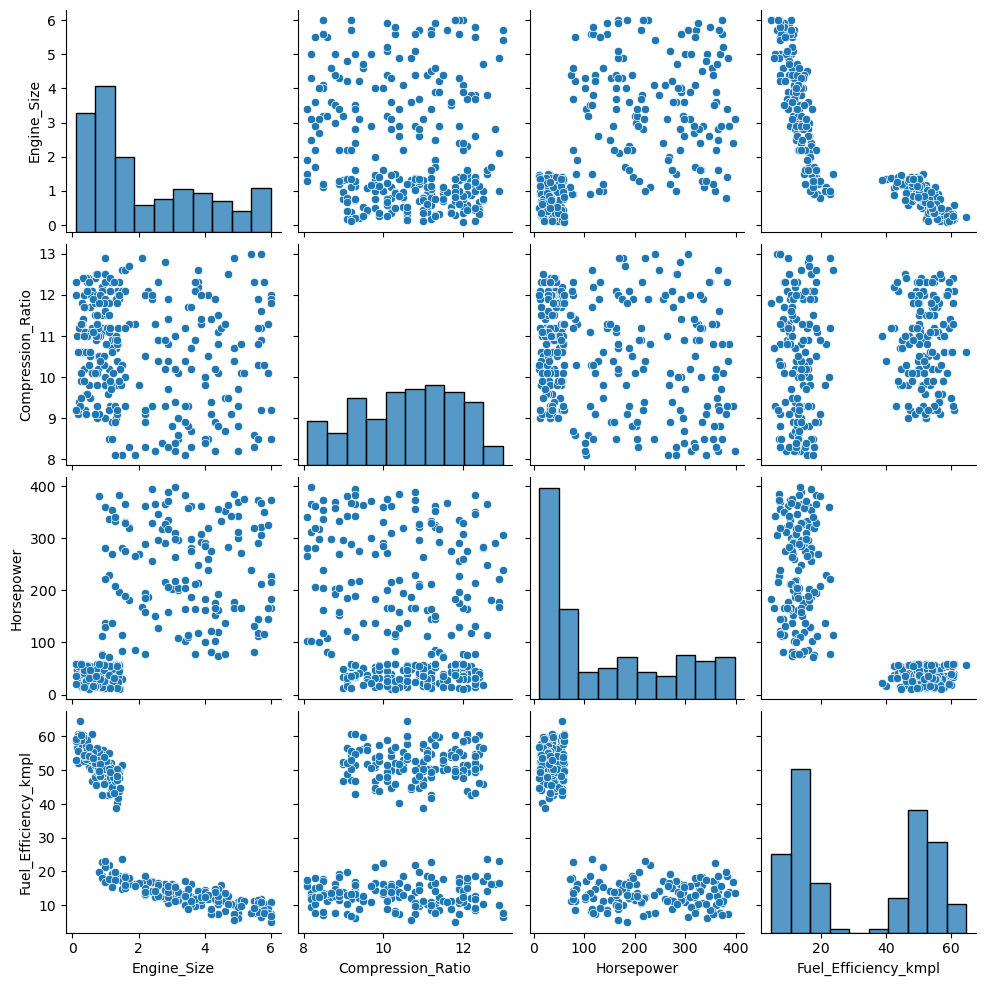

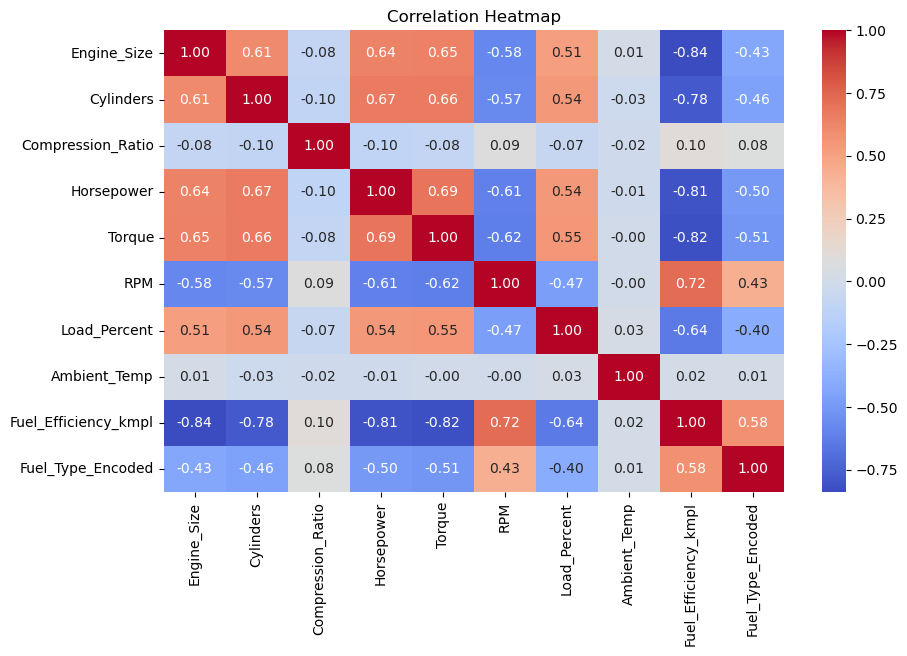

In [93]:
# for better visualisation we will use graphs, heatmaps, countplots
sns.countplot(data = df, x = "Cylinders", hue = "Fuel_Type")
plt.title("Distribution of Cylinders by fuel type")
plt.show 

sns.histplot(df["Fuel_Efficiency_kmpl"], bins =30, kde= True)
plt.title("Fuel Efficency Distribution")
plt.ylabel("Frequency")
plt.xlabel("Fuel Efficiency (km/l)")
plt.show()

sample_df = df.sample(300, random_state= 42)
sns.pairplot(sample_df[["Engine_Size", "Compression_Ratio", "Horsepower", "Fuel_Efficiency_kmpl"]])
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap= "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()
             

In [94]:
# preprocessing
df = df.drop(columns=["Fuel_Type"])
features= ["Engine_Size",	"Cylinders",	"Compression_Ratio",	"Horsepower",	"Torque",	"RPM",	"Load_Percent",	"Ambient_Temp",	"Fuel_Type_Encoded"]
X = df[features]  
y = df['Fuel_Efficiency_kmpl']

In [95]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [96]:
#Train_Test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


In [97]:
#Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [98]:
# DNN Model :)
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Explicitly specifying linear activation
])

dnn_model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])
dnn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100


c:\Users\vivek\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1461.3499 - mean_absolute_error: 32.3496 - val_loss: 1351.6038 - val_mean_absolute_error: 31.1104
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1222.3129 - mean_absolute_error: 28.8819 - val_loss: 809.4720 - val_mean_absolute_error: 23.3385
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 553.3760 - mean_absolute_error: 18.2089 - val_loss: 133.0769 - val_mean_absolute_error: 8.8512
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.4318 - mean_absolute_error: 6.6857 - val_loss: 53.3092 - val_mean_absolute_error: 5.6025
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.6951 - mean_absolute_error: 5.3648 - val_loss: 42.6994 - val_mean_absolute_error: 5.0026
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.1463 - mean_absolute_error: 4.9422 - val_loss: 35.6117 - val_mean_absolute_error: 4.5533
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.6059 - mean_absolute_error: 4.

In [99]:
# Random Forest Model :)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [100]:
#Evaluation
rf_preds = rf_model.predict(X_test_scaled)
dnn_preds = dnn_model.predict(X_test_scaled).flatten()

print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))

print("\nDNN Model Performance:")
print("MSE:", mean_squared_error(y_test, dnn_preds))
print("R2 Score:", r2_score(y_test, dnn_preds))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Random Forest Performance:
MSE: 7.654127361725
R2 Score: 0.9808209242459193

DNN Model Performance:
MSE: 7.40326365442106
R2 Score: 0.9814495176595056


In [101]:
# Saving the in diff file 
joblib.dump(rf_model, "random_forest_modell.pkl")
joblib.dump(scaler, "scaler.pkl")
dnn_model.save("dnn_model.h5")